#                  Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

## Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.

##           Dataset Overview
         Below will be a high-level overview of the dataset.

In [2]:
df = pd.read_csv(r'D:\Data analyst ALX\prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


  ##                 Univariate Exploration
   ###      I will start by looking at the main variable of interest: BorrowerRate.

In [3]:
# Convert EmploymentStatus and IncomeRange to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [4]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

##                  Employment Status:
###    The employment status of the borrower at the time they posted the listing.

###             Does Prosper give loan based on employment status?

###        The plot shows that it is rare that unemployed individual can obtain a loan from Prosper.

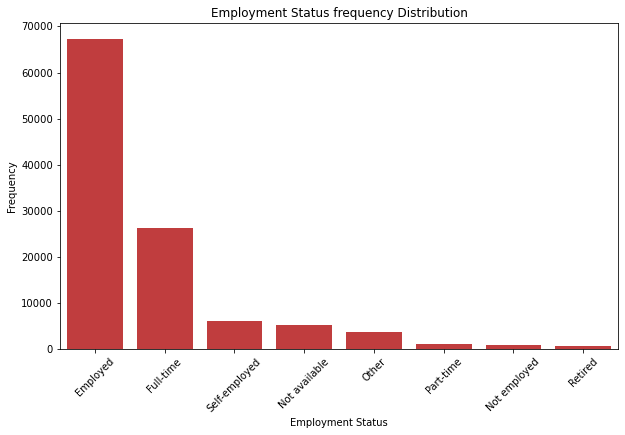

In [5]:
colorChoice = sb.color_palette()[3]

plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'EmploymentStatus', color = colorChoice);
plt.title('Employment Status frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

##                         Income Range:
###   The income range of the borrower at the time the listing was created.

###      Does Prosper give out with income as part of their consideration?

###  The plot shows that most individual who has a loan has an income range from 25k to 75k. However, this plot cannot find any trend related to the amount of income against getting a loan. This plot simply reflects the distribution of income range for people who can obtain a loan.

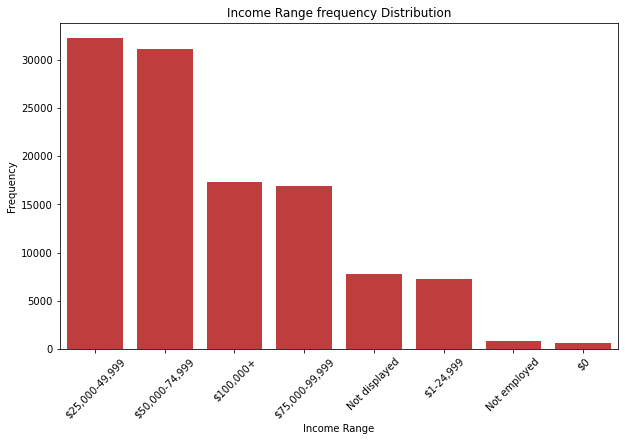

In [6]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'IncomeRange', color = colorChoice);
plt.title('Income Range frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Income Range');
plt.xticks(rotation=45);

##                          Loan Status:
####     The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

###    What is the loan status of people who currently has a loan from Prosper?

###    The plot shows that more than 50,000 individuals has a loan with Prosper, and quite a number has completed the loan. The number of past due and cancelled are quite low.

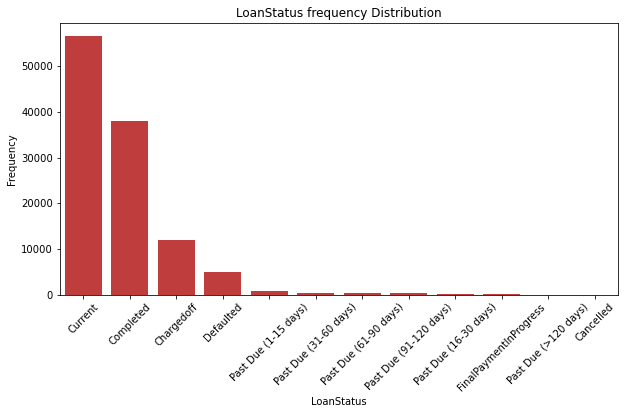

In [7]:
plt.figure(figsize=[10, 5]);
sb.countplot(data = df, x = 'LoanStatus', color = colorChoice);
plt.title('LoanStatus frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('LoanStatus');
plt.xticks(rotation=45);

##                   Prosper Score:
###     A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.

###       What is the distribution of Prosper score for people who has a loan?

###  The plot looks not to be skewed in any direction. Most people has score ranging from 3.0 to 9.0. Score 4.0, 6.0 and 8.0 are among the highest frequencies.

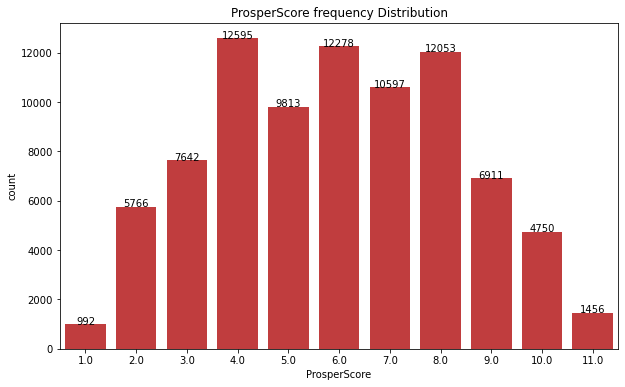

In [8]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'ProsperScore', color = colorChoice);
plt.title('ProsperScore frequency Distribution');

locs, labels = plt.xticks()
cat_counts = df['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

##                           Borrower APR:
###       The Borrower's Annual Percentage Rate (APR) for the loan.

###         What is the borrower's APR for people who has a loan?

###   The plot looks not too skewed. The peak is at around 0.2 and there is another peak at 0.35, which is the highest peak.

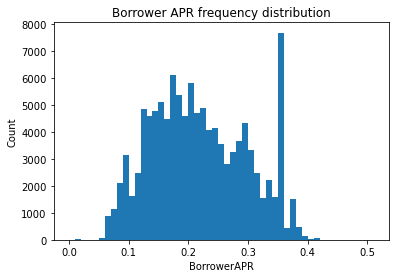

In [9]:
b = np.arange(0,df['BorrowerAPR'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = b);

plt.title('Borrower APR frequency distribution');
plt.xlabel('BorrowerAPR');
plt.ylabel('Count');

##                         BorrowerRate:
###        The Borrower's interest rate for this loan.

###     What is the borrower's APR for people who has a loan?

###   The plot almost identical to that of BorrowerAPR, just shifted left a bit. The peak is at around 0.15 and there is another peak a little over 0.3, which is the highest peak.

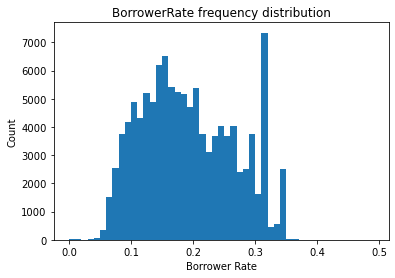

In [10]:
b = np.arange(0,df['BorrowerRate'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = b);

plt.title('BorrowerRate frequency distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

##                      MonthlyLoanPayment
###        It is the monthly payment made by the borrower.

###    What is the monthly loan payment for people who has obtained a loan?

###  The plot is quite skewed to the right. And I would say most people have monthly payment less than 1k.

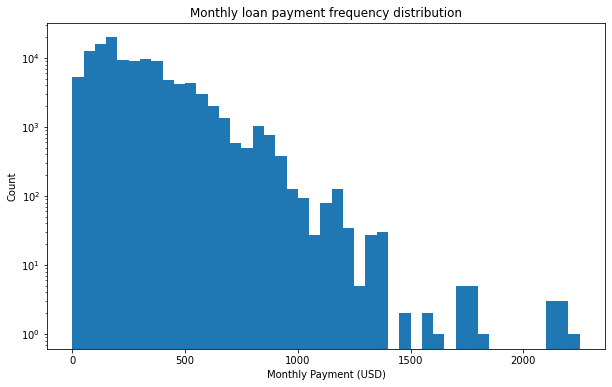

In [3]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

plt.figure(figsize=[10, 6]);
b = np.arange(0,df['MonthlyLoanPayment'].value_counts().index.max(),50)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = b);

plt.title('Monthly loan payment frequency distribution');
plt.xlabel('Monthly Payment (USD)');
plt.ylabel('Count');
plt.yscale('log',)

                          Occupation
The Occupation selected by the Borrower at the time they created the listing.

What is the occupation distribution of borrower?

We will ignore the Other and Professional. We notice computer programmer, executive and administrative assistant are the more common occupations.

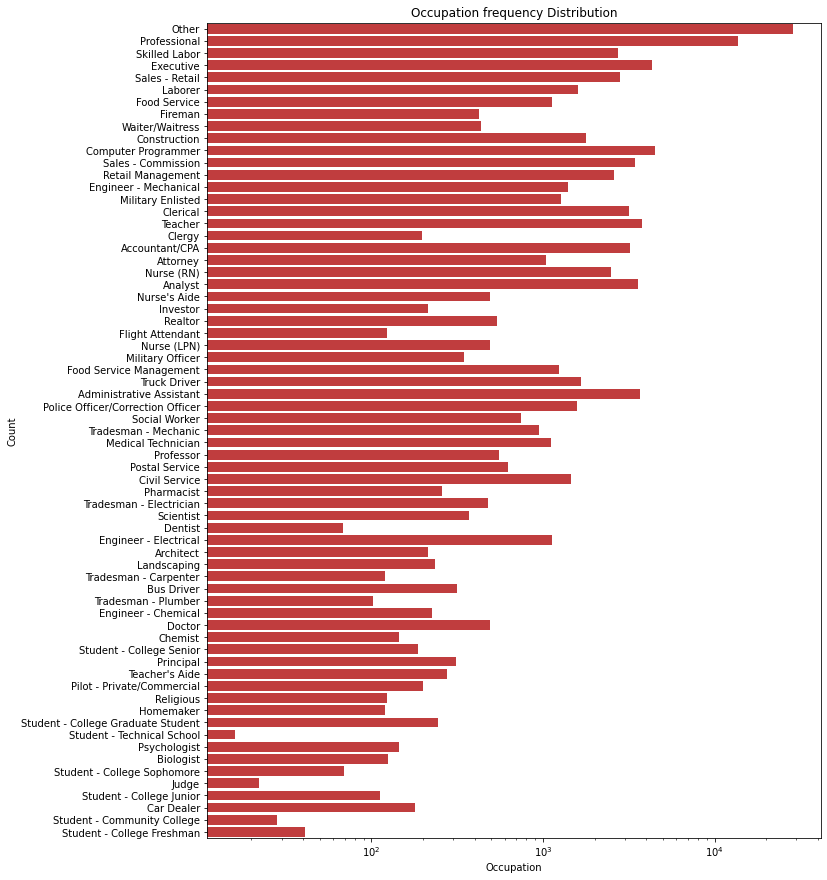

In [12]:
plt.figure(figsize=[11,15]);
sb.countplot(data = df, y = 'Occupation', color = colorChoice);
plt.title('Occupation frequency Distribution');
plt.ylabel('Count');
plt.xlabel('Occupation');
plt.xscale('log');

###            This is a sorted top 10 occupation graph  BELOW

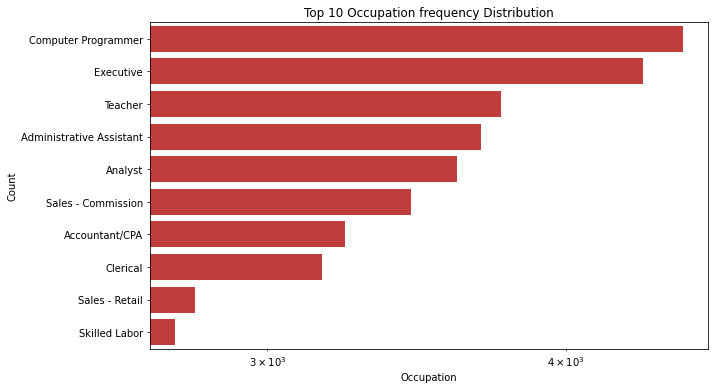

In [13]:
plt.figure(figsize=[10, 6]);
top_ten_occupation = ['Computer Programmer','Executive','Teacher','Administrative Assistant','Analyst','Sales - Commission','Accountant/CPA','Clerical','Sales - Retail','Skilled Labor']
occupation_sub = df.loc[df['Occupation'].isin(top_ten_occupation)]

sb.countplot(data = occupation_sub, y = 'Occupation', color = colorChoice, order = occupation_sub['Occupation'].value_counts().index);
plt.title('Top 10 Occupation frequency Distribution');
plt.ylabel('Count');
plt.xlabel('Occupation');
plt.xscale('log');

###                        Bivariate Exploration
###          Borrower Rate vs. Employment status


 ##           Borrower Rate vs. Income Range
###   We want to look at the relationship between the borrower's rate and employment status, as well as borrower's rate and income range. Does Prosper determine the rate based on employment status and income range?

###  People who are employed don't necessarily have lower rate. But unemployment does have a higher median rate and higher concentrate of frequency are above the median. Looking at the income range plot, there is a slight trend that median rate is lower, the higher the income range is. It seems like income range is part of a determining factor for the rate a borrower will get.

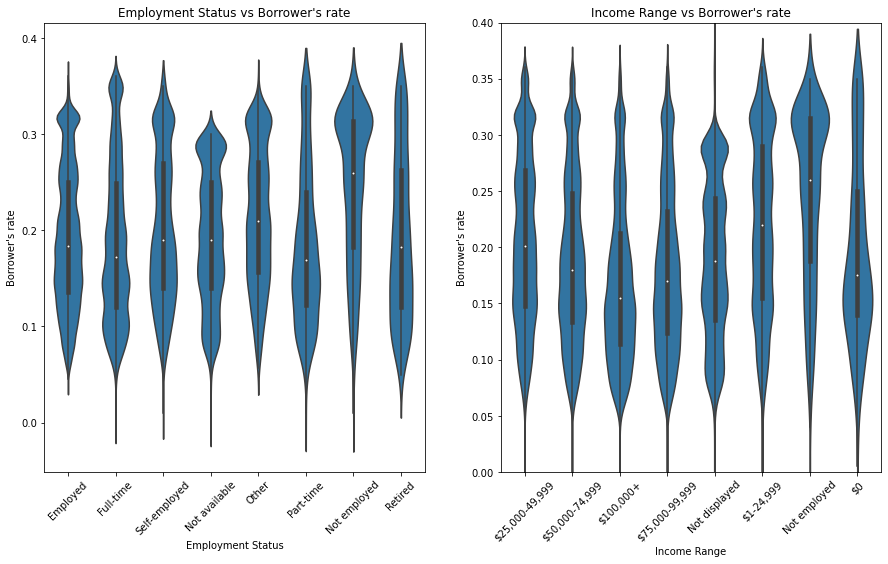

In [14]:
# bivariate plots of total loan amount vs employment status and income range
plt.figure(figsize=[15, 8.27]);
colorChoice = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=colorChoice);
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.violinplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', color=colorChoice);
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

                    Occupation against borrower's rate
Does occupation affect a borrower's rate?

The plot shows that it seems like occupation a factor in the borrower's rate. I notice that occupation will lower average salary such as clerical, nurse's aid, bus driver and teacher's aide all have higher median rate.

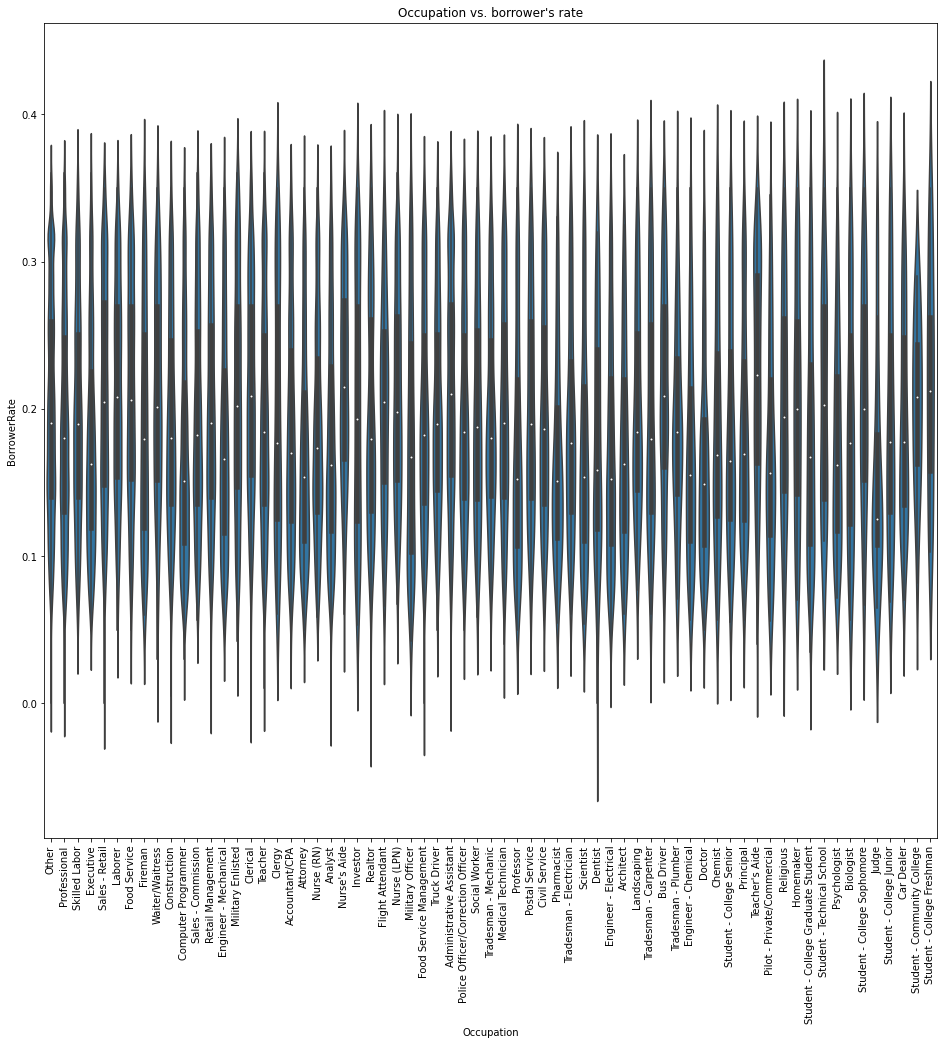

In [15]:
plt.figure(figsize=[16, 15]);
sb.violinplot(data = df, x = 'Occupation', y = 'BorrowerRate', color=colorChoice);
plt.xticks(rotation = '90');
plt.title('Occupation vs. borrower\'s rate');

###  This will be a top 10 Occupation from the previous graph - We notice here that administrative Assistant and clerical have the higher median rate, while analyst have lower median rate.

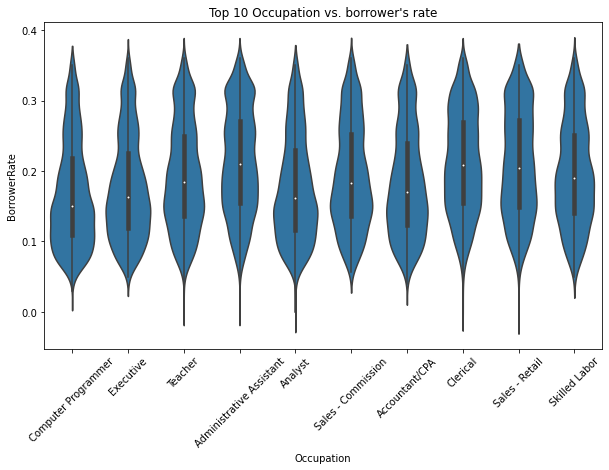

In [16]:
plt.figure(figsize=[10, 6]);
sb.violinplot(data = df, x = 'Occupation', y = 'BorrowerRate', color=colorChoice, order = occupation_sub['Occupation'].value_counts().index);
plt.xticks(rotation = '90');
plt.title('Top 10 Occupation vs. borrower\'s rate');
plt.xticks(rotation=45);

               Monthly loan payment against occupation
Does people with different occupation have a different sized loan payment every month?

The plot shows that the difference are insignificant. Doctor and attorney are 2 that stand out to have higher median monthly payment. It also does make sense since they are 2 usually higher paying jobs.

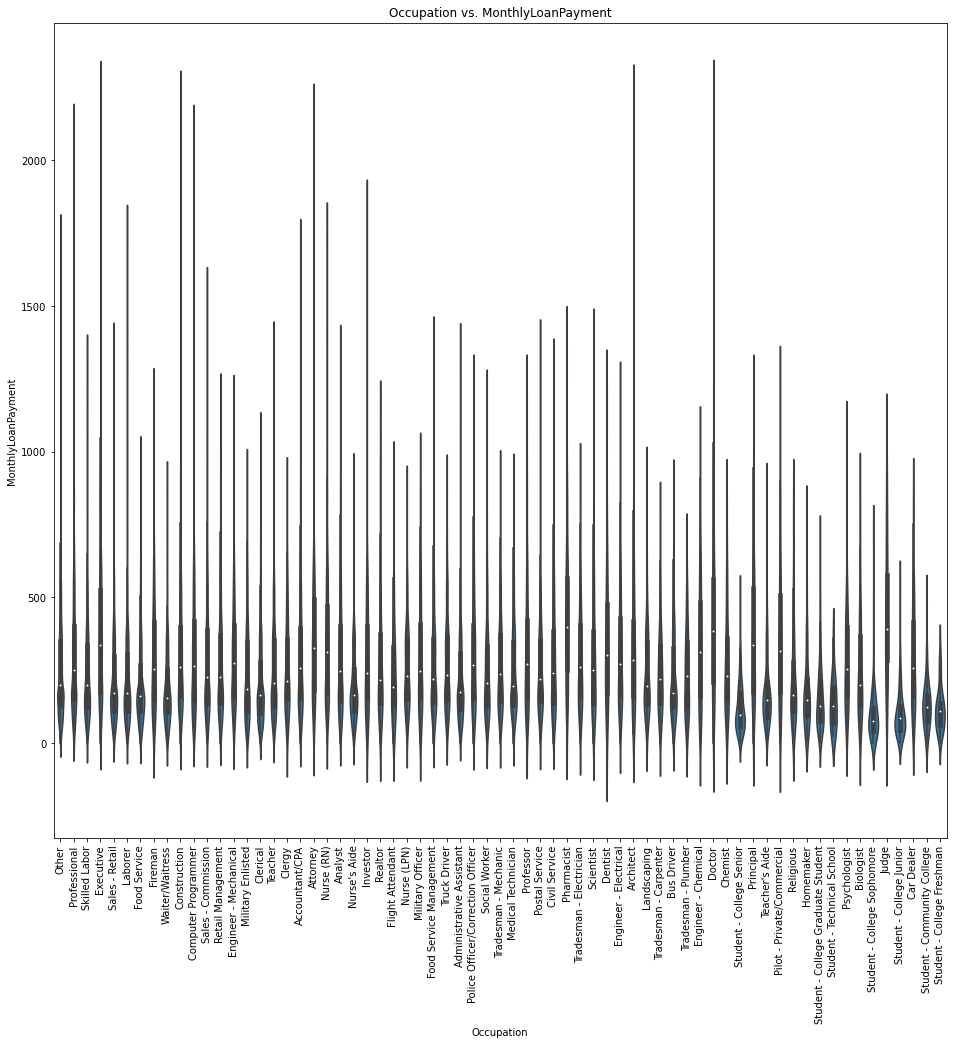

In [17]:
plt.figure(figsize=[16, 15]);
sb.violinplot(data = df, x = 'Occupation', y = 'MonthlyLoanPayment', color=colorChoice);
plt.xticks(rotation = '90');
plt.title('Occupation vs. MonthlyLoanPayment');


This will be a top 10 Occupation from the previous graph -

This graph doesn't give too much useful insight, except we know that executive has the highest median monthly payment out of all of them.

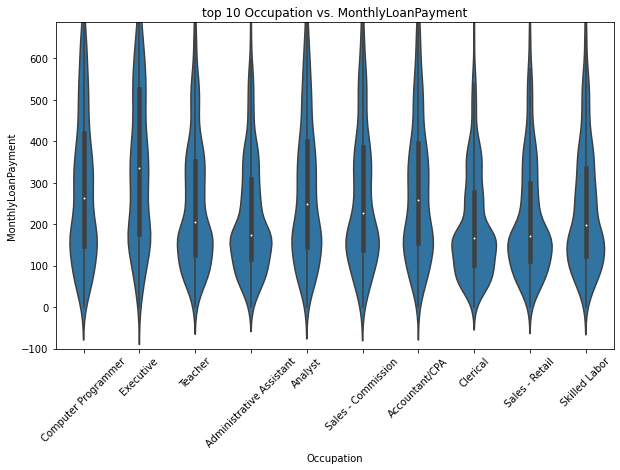

In [18]:
plt.figure(figsize=[10, 6]);
sb.violinplot(data = df, x = 'Occupation', y = 'MonthlyLoanPayment', color=colorChoice,order = occupation_sub['Occupation'].value_counts().index);
plt.xticks(rotation = '45');
plt.ylim(-100,occupation_sub.MonthlyLoanPayment.value_counts().max() + 1, 500)
plt.title('top 10 Occupation vs. MonthlyLoanPayment');

##         Yearly Borrower Rates
###      What is the yearly trend of borrower rates?

###   It is interesting to see that rate goes high up after 2008 until 2011. And since then, the rate is steadily come down until 2014.

In [19]:
df['year'] = df['ListingCreationDate'].astype(str).str[:4]

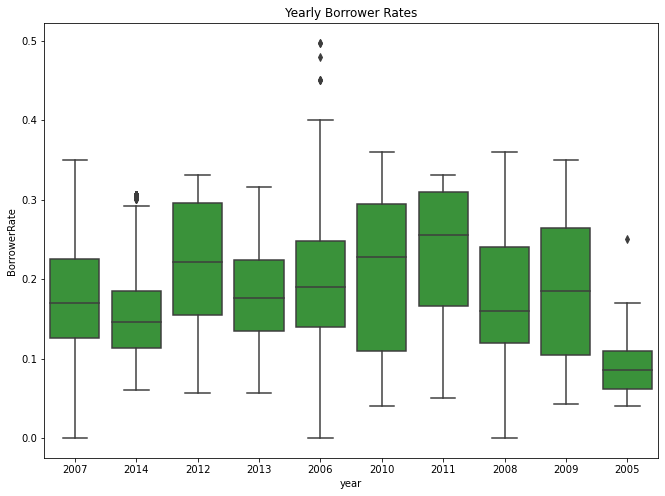

In [20]:
plt.figure(figsize=[11, 8]);
base_color = sb.color_palette()[2];
sb.boxplot(data = df, x = 'year', y = 'BorrowerRate', color = base_color);
plt.title('Yearly Borrower Rates');

##                  Borrower rates vs. ProsperScore
###                 Is rate determined by ProsperScore?

###     This plot shows a strong indication that the score is a good determinating factor of borrower's rate. We see that the higher the score, the lower the rate.

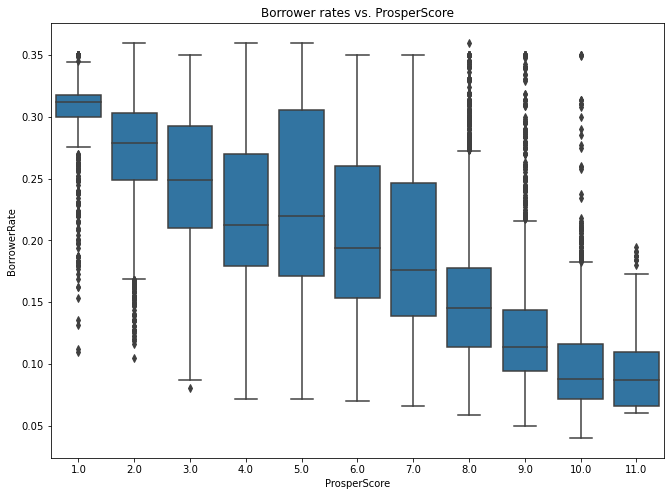

In [21]:
plt.figure(figsize=[11, 8]);
base_color = sb.color_palette()[0];
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', color = base_color);
plt.title('Borrower rates vs. ProsperScore');

##                         Multivariate Exploration
###                 Yearly Borrower rate vs. isHomeOwner
###         Does being a homeowner affect borrower rate?
###  According to the plot, it does seem like homeowners have a slightly lower rate that non-homeowners.

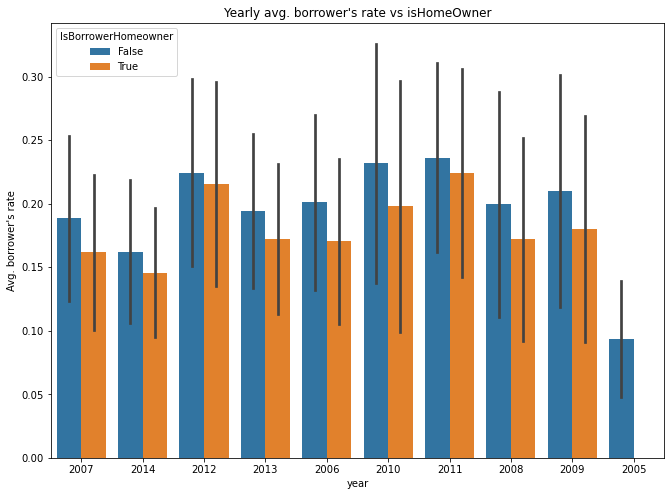

In [22]:
plt.figure(figsize=[11, 8]);
sb.barplot(data = df, x = 'year', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd');
plt.ylabel('Avg. borrower\'s rate');
plt.title('Yearly avg. borrower\'s rate vs isHomeOwner');

Year borrower's rate vs. ProsperScore vs. isHomeOwner
Does yearly prosperScore and homeowner affect borrower's rate?

The trend here is similar to the previous graph. I notice that for score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.

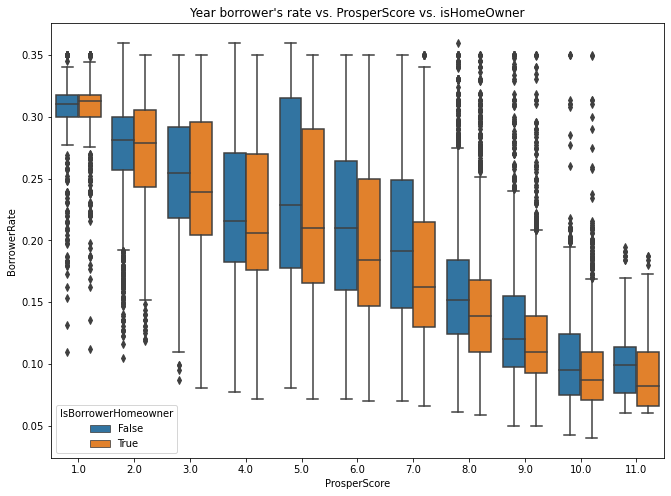

In [23]:
plt.figure(figsize=[11, 8]);
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('Year borrower\'s rate vs. ProsperScore vs. isHomeOwner');

                Year borrower's rate vs. ProsperScore vs. IncomeRange
Does Income range and prosperscore affect borrower's rate?

This plot gives a clear indication that the higher the income, the lower the rate will be. As for those unemployed, the rate will be signficantly higher than those who are employed.

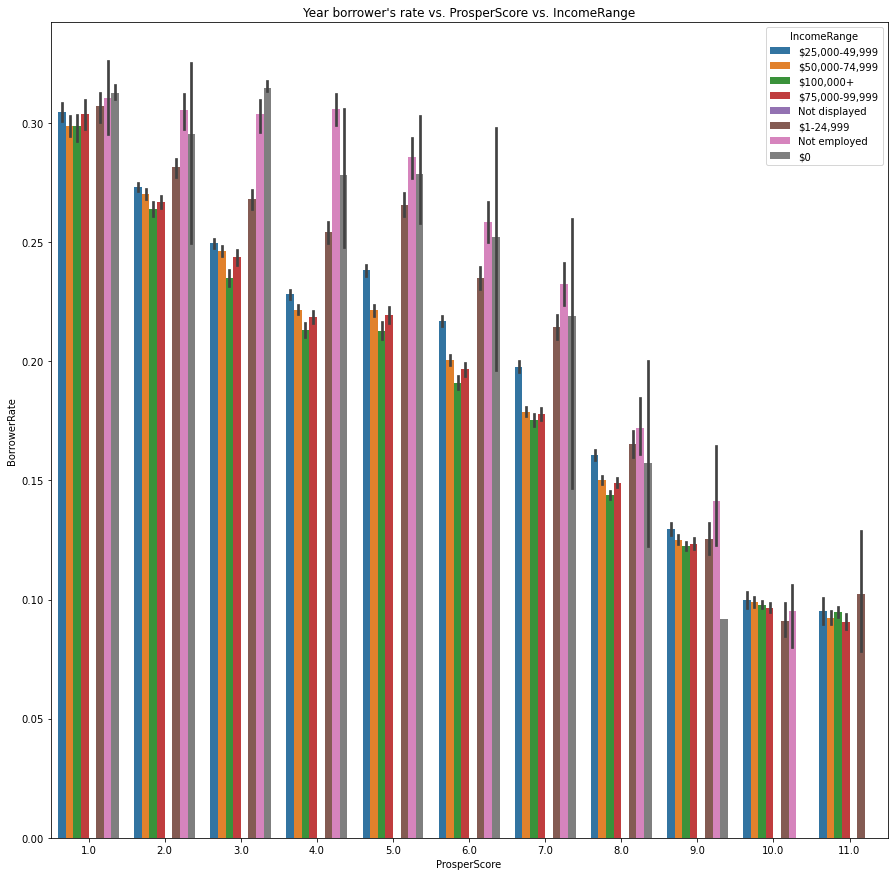

In [24]:
plt.figure(figsize=[15, 15]);
sb.barplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. IncomeRange');

This will be a filtered version of the previous Year borrower's rate vs. ProsperScore vs. IncomeRange graph -

This graph shows that similar insights as the previous one except this is more concise and easier to read and intepret.

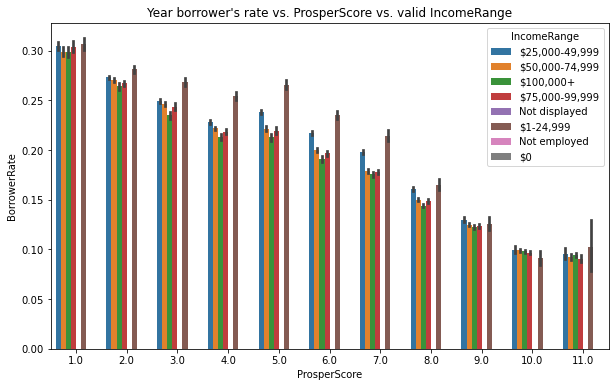

In [25]:
plt.figure(figsize=[10, 6]);
income_range_valid = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','$1-24,999']
income_range_sub = df.loc[df['IncomeRange'].isin(income_range_valid)]

sb.barplot(data = income_range_sub, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. valid IncomeRange');